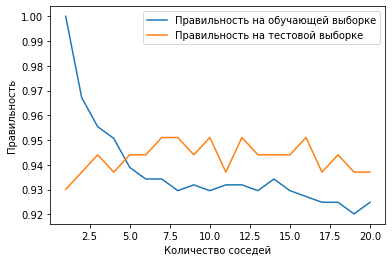

In [ ]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

#KNeighborsClassifier
trainig_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,21)
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    stratify=data.target,
                                                    random_state=5)
for i in neighbors_settings:
  knc = KNeighborsClassifier(n_neighbors=i)
  knc.fit(x_train,y_train)
  trainig_accuracy.append(knc.score(x_train,y_train))
  test_accuracy.append(knc.score(x_test,y_test))

plt.plot(neighbors_settings,trainig_accuracy,label="Правильность на обучающей выборке")
plt.plot(neighbors_settings,test_accuracy,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Количество соседей')
plt.legend()

In [ ]:
boston_dataset = load_boston()
trainig_accuracy=[]
test_accuracy=[]
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
a=boston_dataset.target
boston['MEDV'] = boston_dataset.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = pd.DataFrame(boston['MEDV'])



In [ ]:
#KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=5)
for i in neighbors_settings:
  knr = KNeighborsRegressor(n_neighbors=i)

  knr.fit(x_train,y_train)
  trainig_accuracy.append(knr.score(x_train,y_train))

  knr.fit(x_test,y_test)
  test_accuracy.append(knr.score(x_test,y_test))

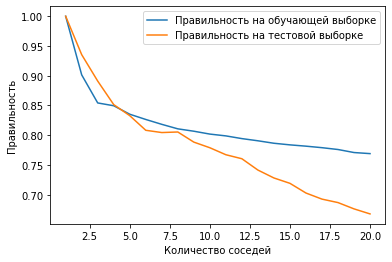

In [ ]:
plt.plot(neighbors_settings,trainig_accuracy,label="Правильность на обучающей выборке")
plt.plot(neighbors_settings,test_accuracy,label="Правильность на тестовой выборке")
plt.ylabel('Правильность')
plt.xlabel('Количество соседей')
plt.legend()

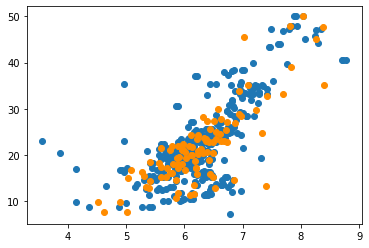

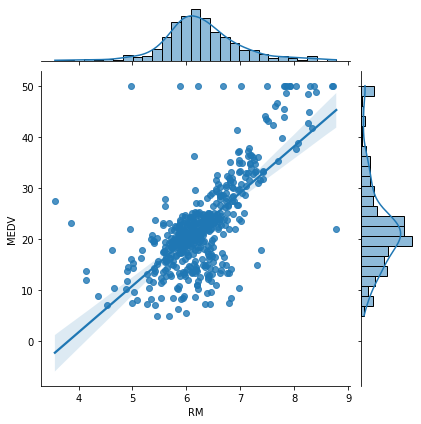

In [ ]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
y_train_predict = knr.predict(x_train)
y_test_predict = knr.predict(x_test)

plt.scatter(x_train['RM'],y_train_predict, marker='o')
plt.scatter(x_test['RM'], (y_test_predict), color="darkorange", marker='o')
import seaborn as sns
sns.jointplot(x='RM',y='MEDV',data=boston,kind='reg')

